<a href="https://colab.research.google.com/github/ilantalala/Assembly-firstMission/blob/main/ImageProcessingEx_01_HistogramEqualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing Assignment 1: Histogram Equalization

Before we start, please put your names and IDs in following format

: Firstname LASTNAME, #00000000   //   (e.g.) Dana LEVI, #12345678

**Your Answer:**   
Xxxxx XXXXX, #nnnnnn

# Histogram Equalization

In this exercise you will implement the **Histogram Equalization** algorithm.

**Pay Attention!** Do not use image processing functions such (ex. `numpy.histogram()`). You have to implement it by yourself.

Method: as explained in class.

Notes:
*   Write your code in the dedicated areas (TODO blocks). You can add helper functions.
*   Submission email should include a link to Colab submission notebook located on your Google Drive with Commenter access right to nev1958a@gmail.com
*   The solution notebook should be able to be run (‘Run all’) with no errors.
In case of errors, the submission will be disqualified.
*   Grade will depend on correct performance on several grayscale images and on clean programming and documentation.
*   Do not forget to add the Names and Student I.D. at the top of the notebook.




# Getting Started

## Setup Code
Before getting started, we need to run some boilerplate code to set up our environment. You will need to rerun this setup code each time you start the notebook.

In [18]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [ ]:
GITHUB_PATH = 'https://raw.githubusercontent.com/dnevo/ImageProcessing/main/images/'

In [ ]:
def read_file(file_name:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image
    in a numpy array.

    Args:
        file_name: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, file_name)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [ ]:
img = read_file(file_name='house.tiff')

In [ ]:
def plot_img(img: np.array, figsize:(int,int)=None):
    if figsize:
        plt.figure(figsize = figsize)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

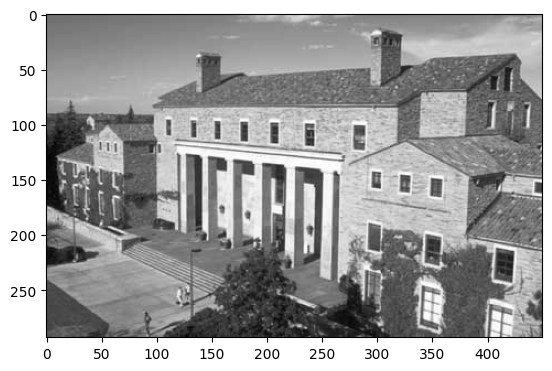

In [19]:
plot_img(img)

In [22]:
def hist_shape(img_src: np.array, img_dest: np.array) -> np.array:
    '''
    This function perform an grayscale image enhancement using Histogram
    Equalization.
    Args:
        img_src: image in int16 format - the image to enhance
        img_dest: image in int16 format - the histogram will be based on it.

    Returns:
        img_new: Returned image, in int16 format - the enhanced image
    '''

    ######################################################################
    # TODO: Implement image enhancement using histogram Equalization.
    ######################################################################

    def histograms(img:np.array):
      hist = np.zeros(256, dtype='int16')
      nrows, ncols = img.shape
      for r in range(nrows):
          for c in range(ncols):
              hist[img[r, c]] += 1

      acc_hist = np.zeros(256, dtype='int32')
      acc_hist[0] = hist[0]
      for i in range(1,256):
          acc_hist[i] = acc_hist[i-1] + hist[i]
      return hist, acc_hist / img.size

    hist_src, acc_hist_src = histograms(img_src)
    hist_dest, acc_hist_dest = histograms(img_dest)

    idx_src = 0
    idx_dest = 0
    NUM_COLOR = 256

    # create a conversion vector to hold the new grayscale transformation
    cv = np.zeros(NUM_COLOR, dtype=np.uint16)
    while idx_src < NUM_COLOR:
        if acc_hist_dest[idx_dest] < acc_hist_src[idx_src]:
            idx_dest = idx_dest + 1
        else:
            cv[idx_src] = idx_dest
            idx_src = idx_src + 1

    # with cv generate the new img
    img_new = np.copy(img_src)
    for i, value in enumerate(img_src.flatten()):
      img_new.flat[i] = cv[img_src.flat[i]]
    return img_new

In [ ]:
def create_tiled_image(img_big: np.array, img_small: np.array) -> np.array:
    '''
    This function receives 2 grayscale image (matrix of int16, values:0..255) and
    creates a new image. The new image consists of tiles of the small image
    which forms the big image. Each of the small image tiles is processed using
    the histShape function to match the histogram of the big image in the same
    location.
    Args:
        img_big: image in int16 format - the image to enhance
        img_small: image in int16 format - the histogram will be based on it.

    Returns:
        img_new: returned image, in int16 format - the tiled image
    '''

    ######################################################################
    # TODO: Implement tiles image using histogram Equalization.
    ######################################################################

    # Replace "pass" statement with your code
    pass
    ######################################################################
    #                            END OF YOUR CODE                        #
    ######################################################################

    return img_new

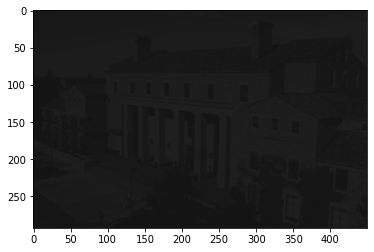

In [ ]:
img_src = read_file(file_name='darkimage.tiff')
plot_img(img_src)

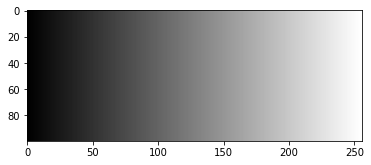

In [ ]:
img_dest = read_file(file_name='flatHistShape.tiff')
plot_img(img_dest)

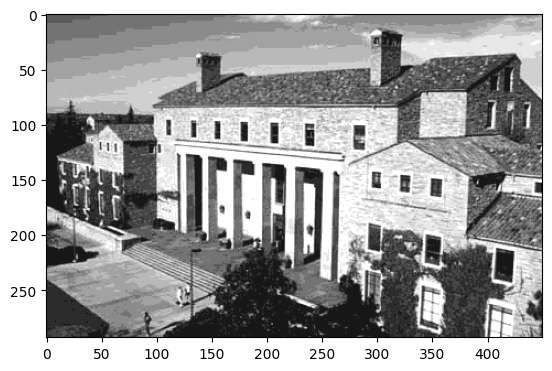

In [25]:
img_new = hist_shape(img_src, img_dest)
plot_img(img_new)

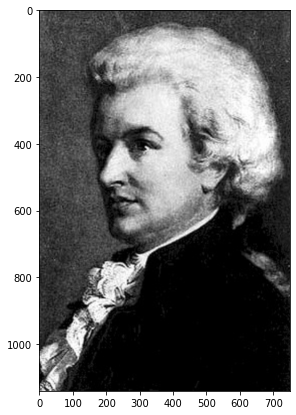

In [ ]:
img_big = read_file(file_name='bigMozart.tiff')
plot_img(img_big, figsize=(7,7))

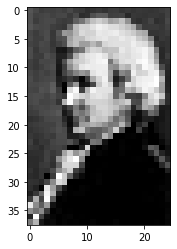

In [ ]:
img_small = read_file(file_name='smallMozart.tiff')
plot_img(img_small)

In [ ]:
img_new = create_tiled_image(img_big, img_small)
plot_img(img_new, figsize=(12,12))